In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [225]:
df = pd.read_csv('german_credit_data.csv', index_col = 0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [226]:
df.shape

(1000, 10)

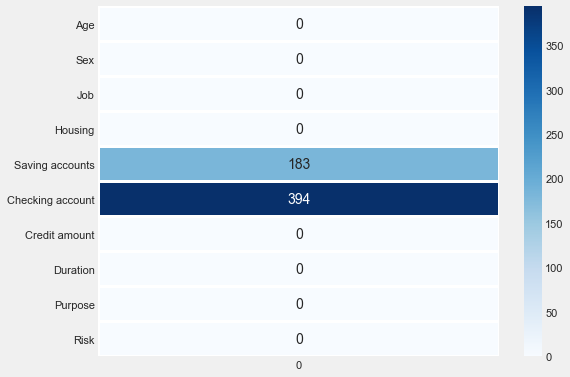

In [227]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isna().sum().to_frame(), cmap = 'Blues' ,annot = True, fmt = 'd',linewidths = 2)
plt.show()

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [229]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']

for col in cat_cols:
    print(df[col].value_counts(), "\n\n")

male      690
female    310
Name: Sex, dtype: int64 


own     713
rent    179
free    108
Name: Housing, dtype: int64 


little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64 


little      274
moderate    269
rich         63
Name: Checking account, dtype: int64 


car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64 


good    700
bad     300
Name: Risk, dtype: int64 




# Risk Visulaization 

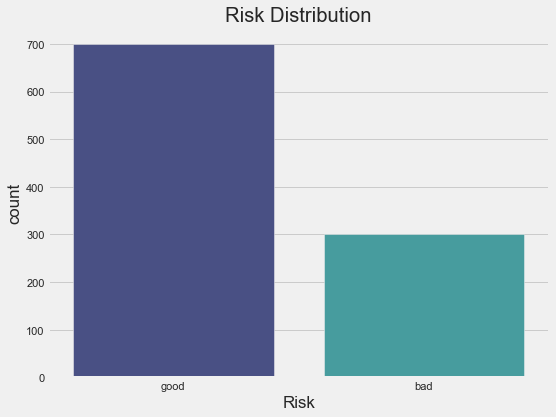

In [230]:
plt.figure(figsize=(8,6))
sns.countplot(x= 'Risk', data=df, palette = 'mako')
plt.title('Risk Distribution')
plt.show()

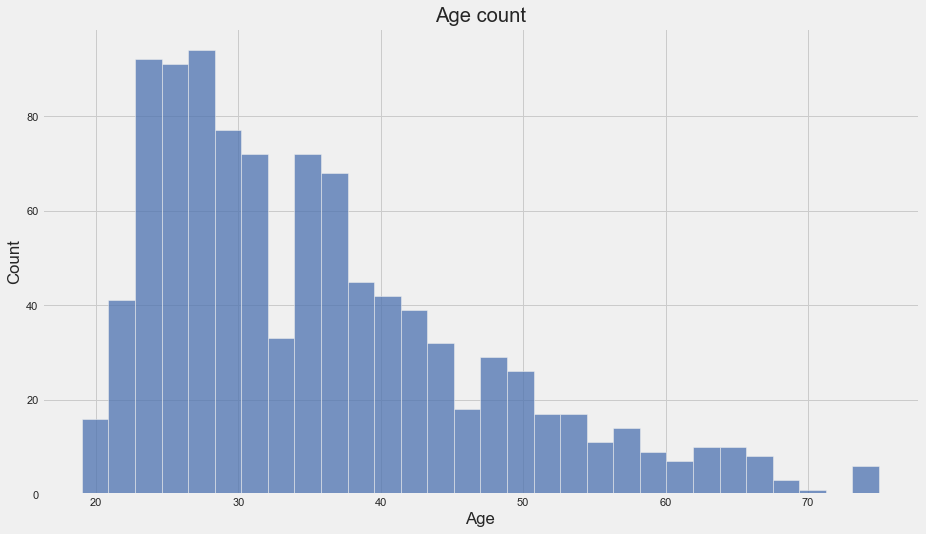

In [231]:
plt.figure(figsize=(14,8))
sns.histplot(x='Age', data=df, bins = 30)
plt.title('Age count')
plt.show()

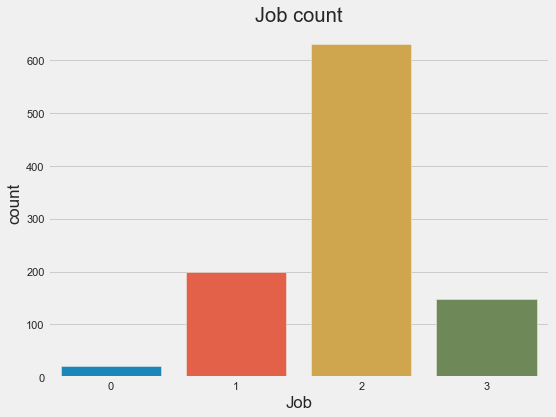

In [232]:
plt.figure(figsize=(8,6))
sns.countplot(x='Job',data=df)
plt.title('Job count')
plt.show()

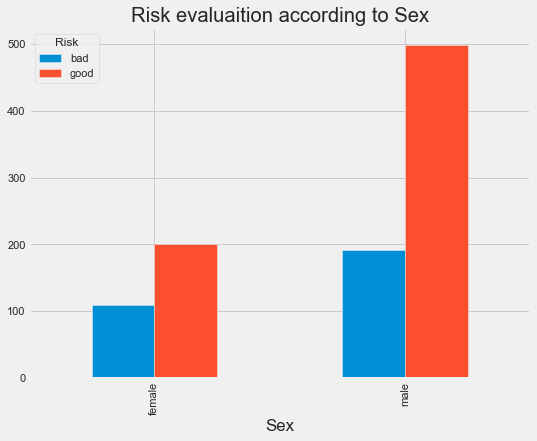

In [233]:
pd.crosstab(df.Sex, df.Risk).plot(kind = 'bar', figsize=(8,6))
plt.title('Risk evaluaition according to Sex')
plt.show()

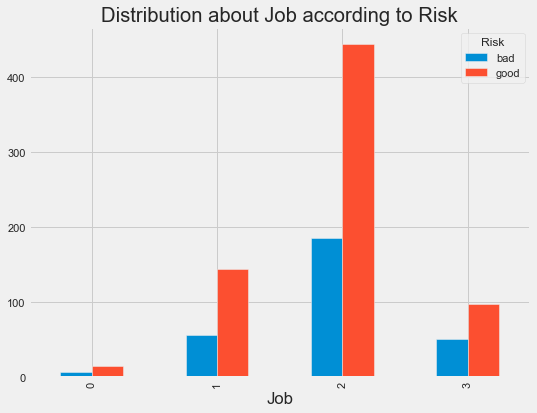

In [234]:
pd.crosstab(df.Job, df.Risk).plot(kind = 'bar', figsize=(8,6))
plt.title('Distribution about Job according to Risk')
plt.show()

In [235]:
df[['Job', 'Risk']].groupby(['Job'], as_index = False).count().sort_values(by='Risk', 
                                                                           ascending = False)

,Job,Risk
2,2,630
1,1,200
3,3,148
0,0,22


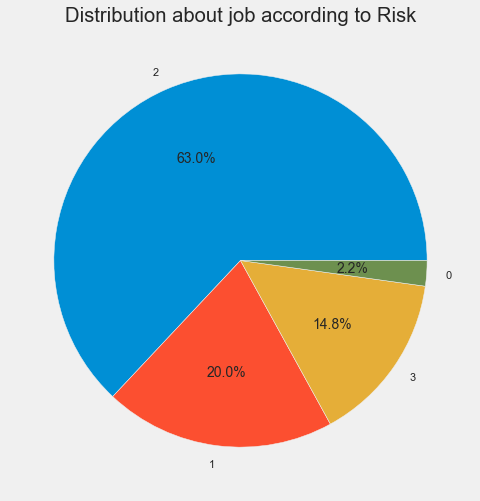

In [236]:
labels = df['Job'].value_counts().index
size = df['Job'].value_counts().values

plt.figure(figsize=(8,8))
plt.pie(size, labels=labels, autopct = '%1.1f%%')
plt.title('Distribution about job according to Risk')
plt.show()

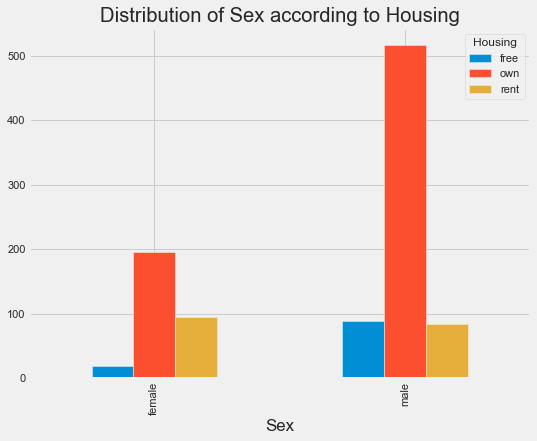

In [237]:
pd.crosstab(df.Sex, df.Housing).plot(kind = 'bar', figsize=(8,6))
plt.title('Distribution of Sex according to Housing')
plt.show()

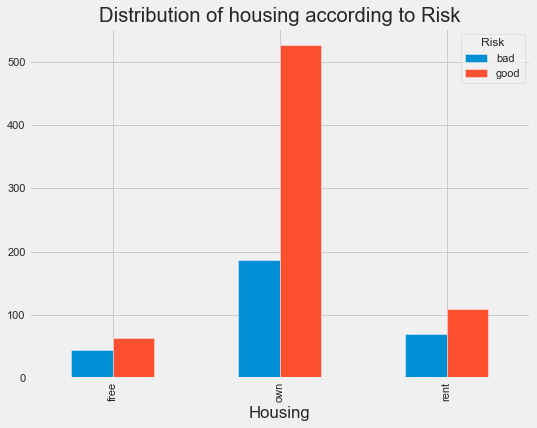

In [238]:
pd.crosstab(df.Housing, df.Risk).plot(kind = 'bar', figsize=(8,6))
plt.title('Distribution of housing according to Risk')
plt.show()

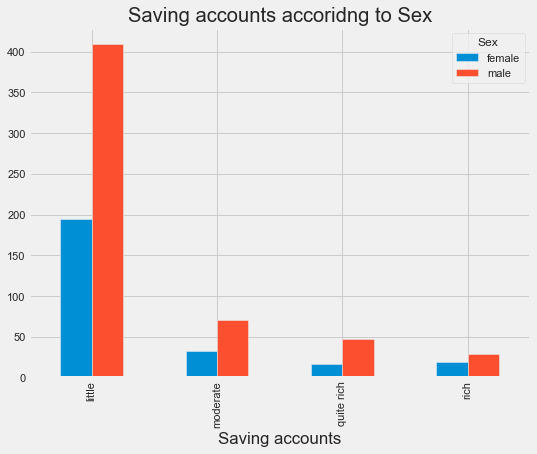

In [239]:
pd.crosstab(df['Saving accounts'], df['Sex']).plot(kind = 'bar', figsize=(8,6))
plt.title('Saving accounts accoridng to Sex')
plt.show()

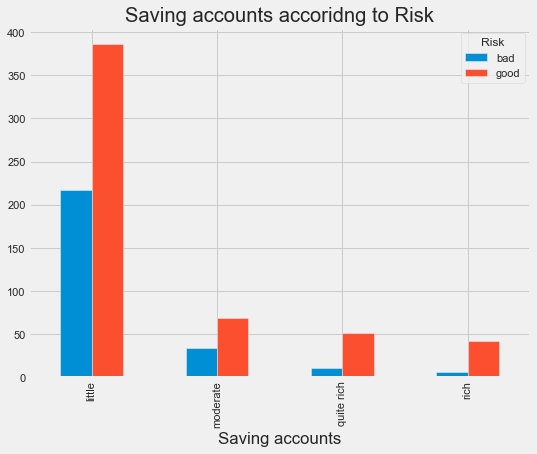

In [240]:
pd.crosstab(df['Saving accounts'], df['Risk']).plot(kind = 'bar', figsize=(8,6))
plt.title('Saving accounts accoridng to Risk')
plt.show()

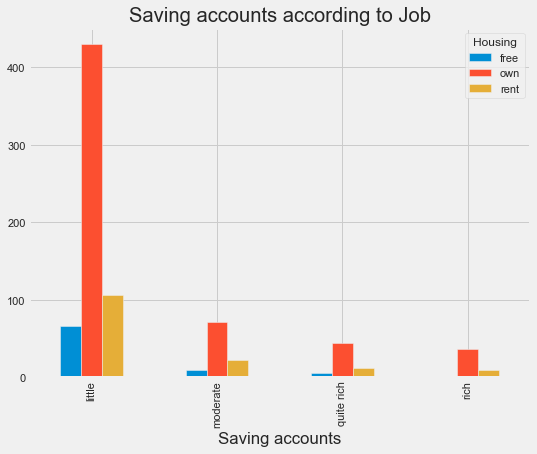

In [241]:
pd.crosstab(df['Saving accounts'], df['Housing']).plot(kind = 'bar', figsize = (8,6))
plt.title('Saving accounts according to Job')
plt.show()

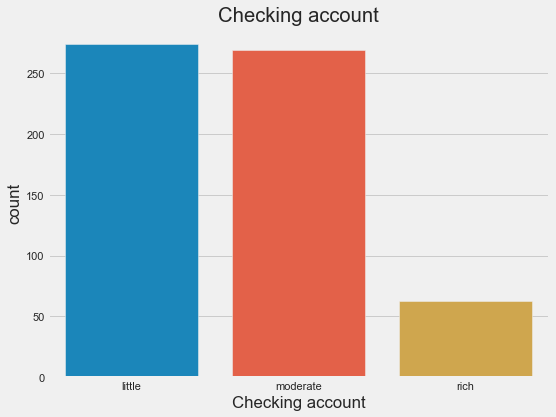

In [242]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Checking account', data = df)
plt.title('Checking account')
plt.show()

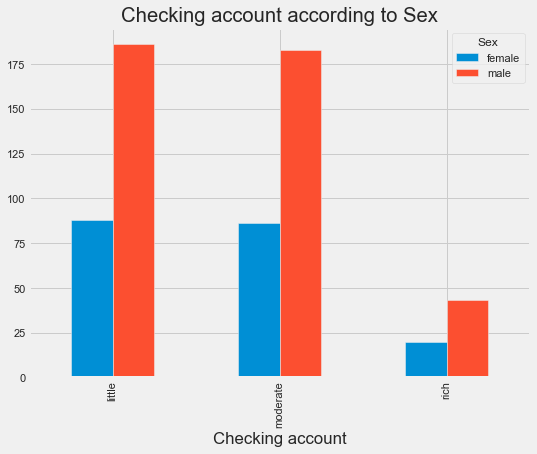

In [243]:
pd.crosstab(df['Checking account'],df['Sex']).plot(kind = 'bar', figsize=(8,6))
plt.title('Checking account according to Sex')
plt.show()

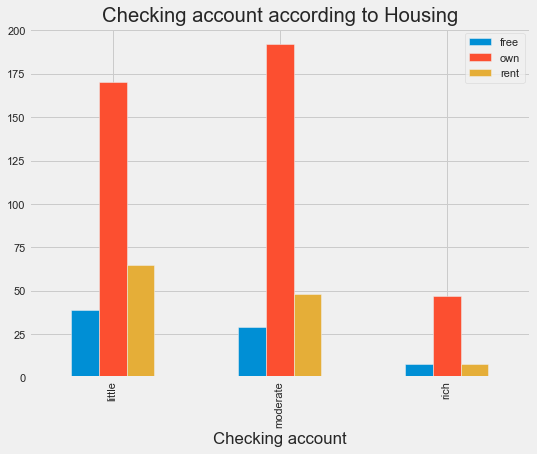

In [244]:
pd.crosstab(df['Checking account'],df['Housing']).plot(kind = 'bar', figsize=(8,6))
plt.title('Checking account according to Housing')
plt.legend()
plt.show()

In [245]:
df[['Checking account', 'Job']].groupby(['Checking account'],as_index = False).count().sort_values(by  = 'Job',
                                                                                  ascending = False)

,Checking account,Job
0,little,274
1,moderate,269
2,rich,63


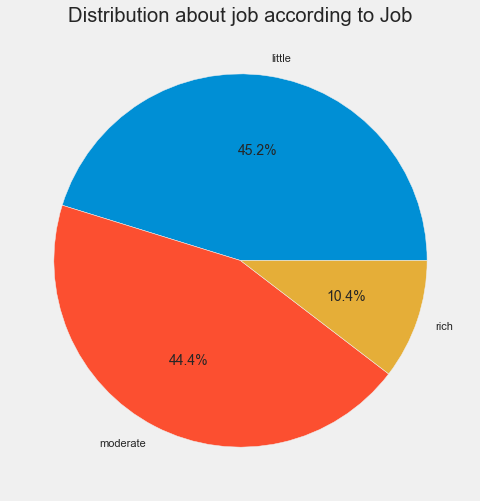

In [246]:
labels = df['Checking account'].value_counts().index
size = df['Checking account'].value_counts().values

plt.figure(figsize=(8,8))
plt.pie(size, labels=labels, autopct = '%1.1f%%')
plt.title('Distribution about job according to Job')
plt.show()

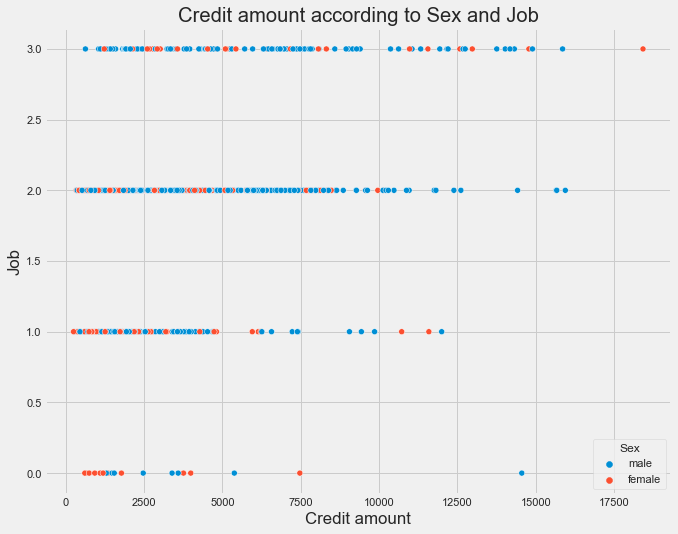

In [247]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Credit amount', y = 'Job', hue = 'Sex',data = df)
plt.title('Credit amount according to Sex and Job')
plt.show()

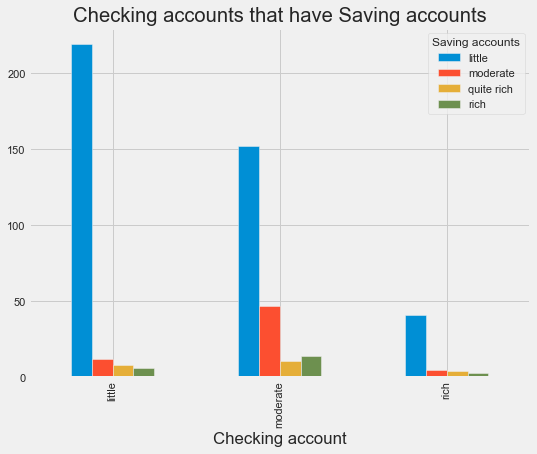

In [248]:
pd.crosstab(df['Checking account'], df['Saving accounts']).plot(kind = 'bar', figsize = (8,6))
plt.title('Checking accounts that have Saving accounts')
plt.show()

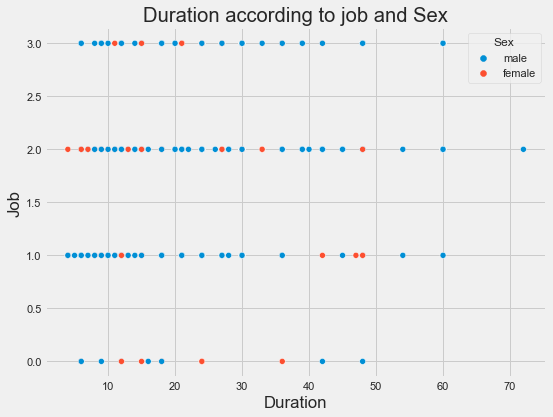

In [249]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Duration', y = 'Job', hue = 'Sex' ,data = df)
plt.title('Duration according to job and Sex')
plt.show()

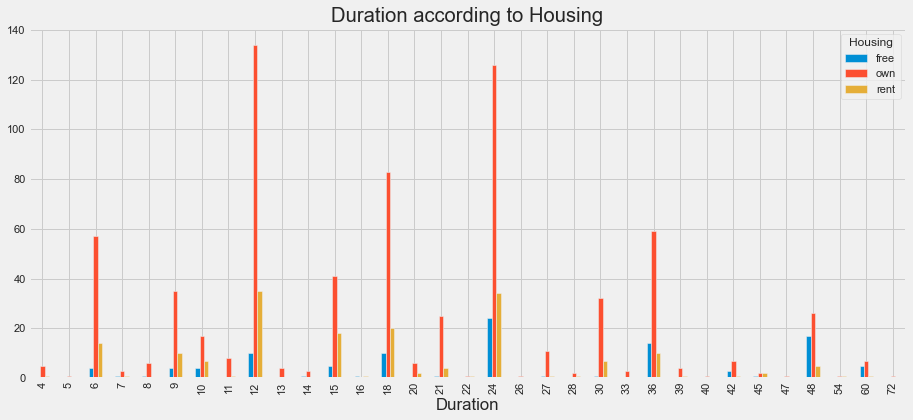

In [250]:
pd.crosstab(df['Duration'], df['Housing']).plot(kind = 'bar', figsize = (14,6))
plt.title('Duration according to Housing')
plt.show()

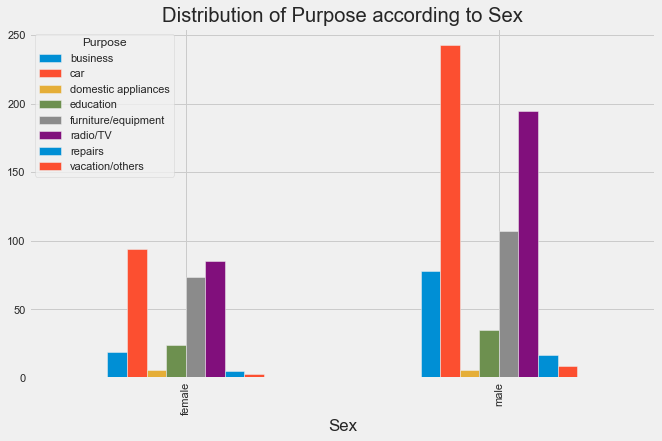

In [251]:
pd.crosstab(df.Sex, df.Purpose).plot(kind = 'bar', figsize=(10,6))
plt.title('Distribution of Purpose according to Sex')
plt.show()

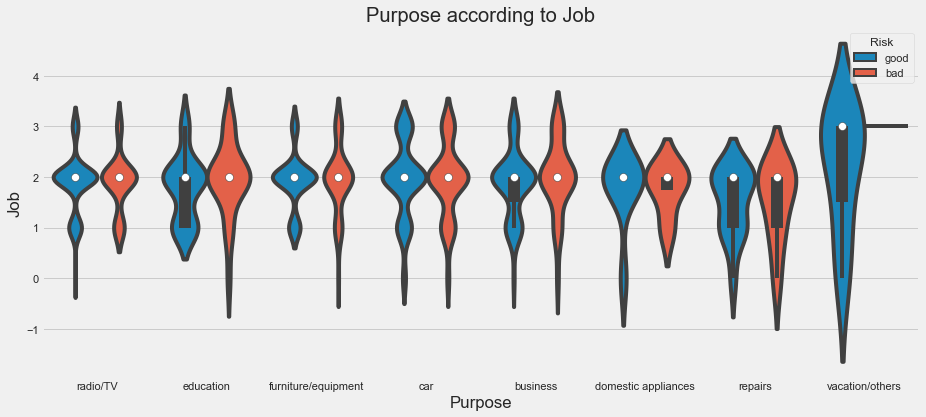

In [252]:
plt.figure(figsize=(14,6))
sns.violinplot(x = 'Purpose', y = 'Job', hue = 'Risk' ,data = df)
plt.title('Purpose according to Job')
plt.show()

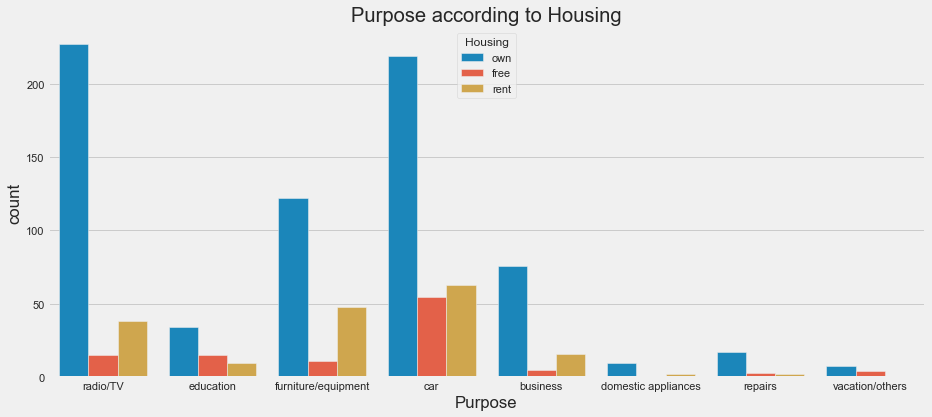

In [253]:
plt.figure(figsize = (14,6))
sns.countplot(x = 'Purpose',hue = 'Housing', data = df)
plt.title('Purpose according to Housing')
plt.show()

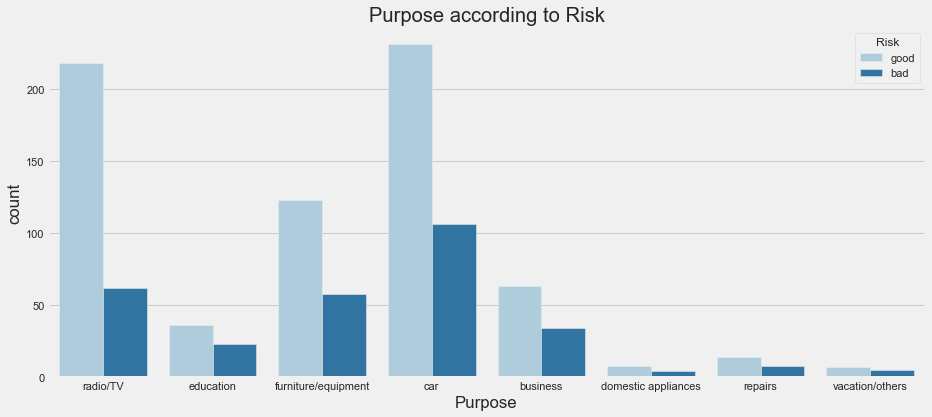

In [254]:
plt.figure(figsize=(14,6))
sns.countplot(x = 'Purpose', hue = 'Risk', data = df, palette = 'Paired')
plt.title('Purpose according to Risk')
plt.show()

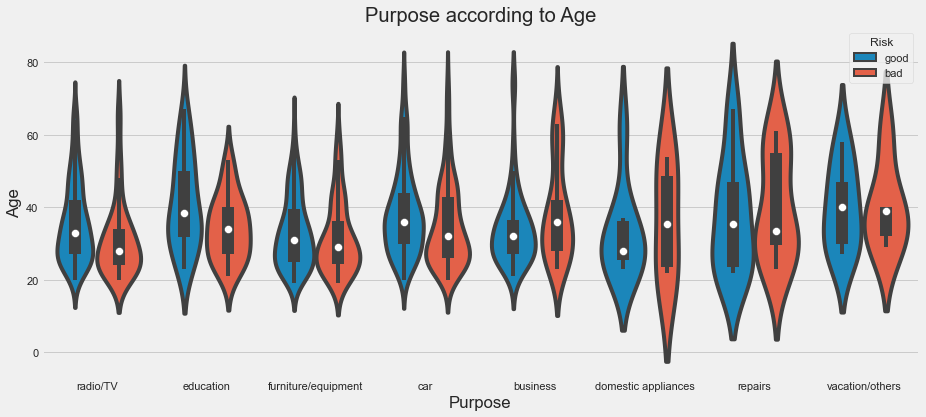

In [255]:
plt.figure(figsize=(14,6))
sns.violinplot(x = 'Purpose', y = 'Age',hue = 'Risk', data = df)
plt.title('Purpose according to Age')
plt.show()

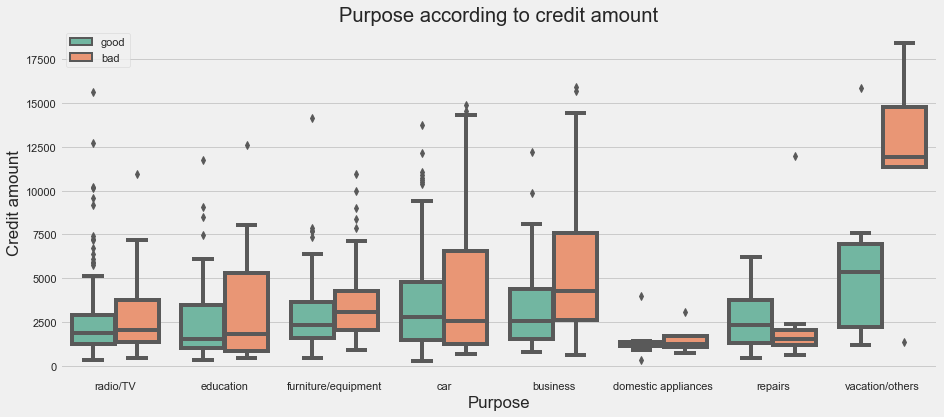

In [256]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Purpose', y = 'Credit amount', hue = 'Risk', data = df, palette = 'Set2')
plt.title('Purpose according to credit amount')
plt.legend(loc = 'upper left')
plt.show()

In [257]:
date_int = ["Purpose", 'Sex']
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = "viridis")

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


# Data Preprocessing and Feature Engineering
## Missing Values Analysis

In [258]:
def missing_values_table(datframe):
    variable_with_na = [col for col in df.columns if df[col].isnull().sum()>0]
    n_miss = df[variable_with_na].isnull().sum().sort_values(ascending = False)
    ratio = (df[variable_with_na].isnull().sum() / df.shape[0]*100).sort_values(ascending = False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis = 1, keys = ['n_miss','ratio'])
    print(missing_df)
    return variable_with_na
missing_values_table(df)

                  n_miss  ratio
Checking account     394   39.4
Saving accounts      183   18.3


['Saving accounts', 'Checking account']

## Filling missing values with mode 

In [259]:
df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace = True)
df['Checking account'].fillna(df['Checking account'].mode()[0], inplace = True)

In [260]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, accuracy_score, mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import precision_score, f1_score, recall_score, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [261]:
df = df.apply(preprocessing.LabelEncoder().fit_transform)

In [262]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,48,1,2,1,0,0,142,2,5,1
1,3,0,2,1,0,1,770,29,5,0
2,30,1,1,1,0,0,390,8,3,1
3,26,1,2,0,0,0,848,26,4,1
4,34,1,2,0,0,0,734,17,1,0
...,...,...,...,...,...,...,...,...,...,...
995,12,0,1,1,0,0,310,8,4,1
996,21,1,3,1,0,0,661,21,1,1
997,19,1,2,1,0,0,69,8,5,1
998,4,1,2,0,0,0,332,27,5,0


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int32
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int32
 4   Saving accounts   1000 non-null   int32
 5   Checking account  1000 non-null   int32
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int32
 9   Risk              1000 non-null   int32
dtypes: int32(6), int64(4)
memory usage: 94.8 KB


In [264]:
X = df.drop('Risk', axis = 1)
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.3)

In [265]:
log = sm.Logit(y, X)
log.fit()

Optimization terminated successfully.
         Current function value: 0.573391
         Iterations 6


In [266]:
log.fit().summary()

Optimization terminated successfully.
         Current function value: 0.573391
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Sun, 18 Jul 2021   Pseudo R-squ.:                 0.06134
Time:                        09:38:26   Log-Likelihood:                -573.39
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 5.057e-13
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0225      0.006      3.471      0.001       0.010       0.035
Sex                  0.5039      0.151      3.330      0.001       0.207       0.801
Job                  0.1334      0.100      1.328      0.184      -0.064       0.330
Housing              0.1628      0.114      1.433      0.152      -0.060       0.386
Saving accounts      0.3662      0.104      3.505      0.000       0.161       0.571
Checking account    -0.1578      0.116     -1.366      0.172      -0.384       0.069
Credit amount        0.0008      0.000      2.271      0.023       0.000       0.002
Duration            -0.0744      0.013     -5.870      0.000      -0.099      -0.050
Purpose              0.1122      0.035      3.242      0.001       0.044       0.180
====================================================================================
"""

# Logistic Regression 

In [267]:
model = LogisticRegression()
model.fit(X_train, y_train)
# model.score(X_test, y_test)
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:,1]

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.7142857142857143
0.9615384615384616
0.819672131147541
0.5459866220735786


In [268]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.13      0.21        92
           1       0.71      0.96      0.82       208

    accuracy                           0.71       300
   macro avg       0.66      0.55      0.52       300
weighted avg       0.68      0.71      0.63       300



In [269]:
print(f'ROC AUC SCORE {roc_auc_score(y_test, y_probs)}')

ROC AUC SCORE 0.6528010033444815


In [270]:
print('cross validation score with 5 folds')
print(f'ROC AUC {round(cross_val_score(model, X, y, cv = 5, scoring = "roc_auc").mean(),2)}')
print(f'Precision {round(cross_val_score(model, X, y, cv = 5, scoring = "precision").mean(),2)}')
print(f"F1 {round(cross_val_score(model, X, y, cv = 5, scoring = 'f1').mean(),2)}")
print(f'Recall {round(cross_val_score(model, X ,y, cv = 5, scoring = "recall").mean(),2)}')

cross validation score with 5 folds
ROC AUC 0.66
Precision 0.73
F1 0.83
Recall 0.95


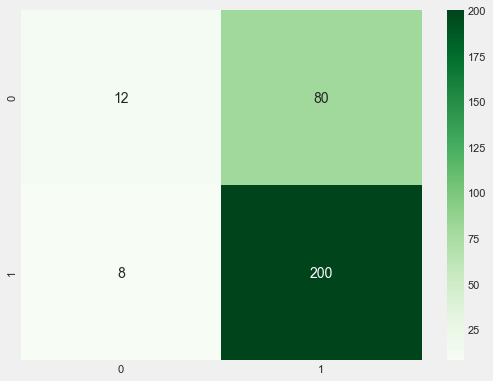

In [271]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap ='Greens')
plt.show()

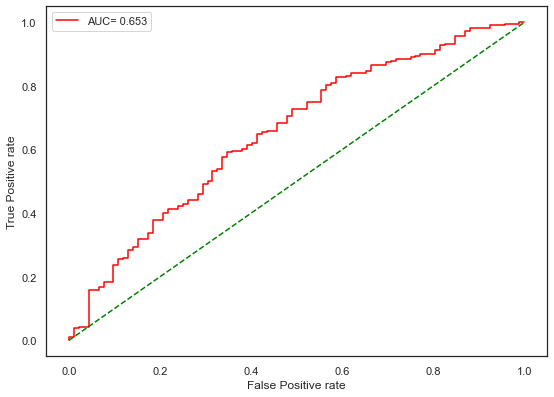

In [272]:
fpr, tpr, threshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
sns.set_theme(style = 'white')
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', label = 'AUC= %0.3f'%roc_auc)
plt.plot([0,1],[0,1], linestyle = '--', color = 'green')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()

In [273]:
accuracy_score(y_test, y_pred)

0.7066666666666667

# Naive Bayes 

In [274]:
model1 = GaussianNB()
model1.fit(X_train, y_train)
y_preds = model1.predict(X_test)
y_probs = model1.predict_proba(X_test)[:,1]

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.7142857142857143
0.9615384615384616
0.819672131147541
0.5459866220735786


In [275]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.13      0.21        92
           1       0.71      0.96      0.82       208

    accuracy                           0.71       300
   macro avg       0.66      0.55      0.52       300
weighted avg       0.68      0.71      0.63       300



In [276]:
print(f'ROC AUC SCOR: {roc_auc_score(y_test, y_probs)}')

ROC AUC SCOR: 0.6676421404682273


In [277]:
print('Cross validation with 5 folds')
print(f'ROC AUC by precision {round(cross_val_score(model1, X, y, cv=5, scoring = "precision").mean(),2)}')
print(f'ROC AUC by roc_auc {round(cross_val_score(model1, X, y, cv = 5, scoring = "roc_auc").mean(),2)}')
print(f'ROC AUC by f1 {round(cross_val_score(model1, X, y, cv = 5, scoring = "f1").mean(),2)}')
print(f'ROC AUC by recall {round(cross_val_score(model1, X, y, cv = 5, scoring = "recall").mean(),2)}')

Cross validation with 5 folds
ROC AUC by precision 0.74
ROC AUC by roc_auc 0.65
ROC AUC by f1 0.78
ROC AUC by recall 0.83


In [278]:
accuracy_score(y_test, y_preds)

0.6933333333333334

# Gradient Boosting Classifier 

In [279]:
gb = GradientBoostingClassifier()
gb_fit = gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_probs = gb.predict_proba(X_test)[:,1]

print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.7410358565737052
0.8104575163398693
0.8942307692307693
0.5938545150501673


In [280]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.29      0.38        92
           1       0.74      0.89      0.81       208

    accuracy                           0.71       300
   macro avg       0.65      0.59      0.60       300
weighted avg       0.68      0.71      0.68       300



In [281]:
print(f'ROC AUC SCORE: {roc_auc_score(y_test, y_probs)}')

ROC AUC SCORE: 0.6596989966555185


In [282]:
print('Cross validation with 5 folds')
print(f'ROC AUC by precision {round(cross_val_score(gb, X, y, cv=5, scoring = "precision").mean(),2)}')
print(f'ROC AUC by roc_auc {round(cross_val_score(gb, X, y, cv = 5, scoring = "roc_auc").mean(),2)}')
print(f'ROC AUC by f1 {round(cross_val_score(gb, X, y, cv = 5, scoring = "f1").mean(),2)}')
print(f'ROC AUC by recall {round(cross_val_score(gb, X, y, cv = 5, scoring = "recall").mean(),2)}')

Cross validation with 5 folds
ROC AUC by precision 0.73
ROC AUC by roc_auc 0.66
ROC AUC by f1 0.8
ROC AUC by recall 0.89


In [283]:
accuracy_score(y_test, y_pred)

0.71

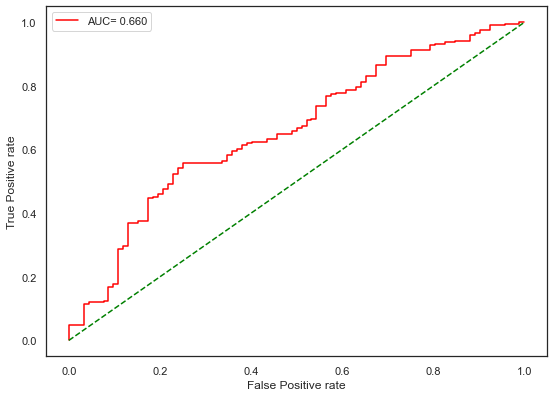

In [284]:
fpr, tpr, threshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
sns.set_theme(style = 'white')
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', label = 'AUC= %0.3f'%roc_auc)
plt.plot([0,1],[0,1], linestyle = '--', color = 'green')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()

In [285]:
cross_val_score(gb_fit, X_test, y_test, cv = 10).mean()

0.72